In [84]:
import random #números aleatorios
import math #funciones matematicas estandar.
from matplotlib import pyplot as plt #Para visualizaciones y gráficos.
import numpy as np #funciones estadísticas 
import seaborn as sns # para realizar gráficos estadísticos.
from mpl_toolkits.mplot3d import axes3d #graficas en 3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

Generar datos

In [85]:
Num= 20 #numero de datos
C_i= 0. #cota inferior
C_s= 10. #Cota superior

a = np.random.uniform(C_i, C_s, Num)
#print(a)
a.sort()
x=a
#print(x)
d = np.random.uniform(0.0,0.5,len(x))
y = x+d
# para sus barras de error
x_e=np.random.normal(0.1,0.3,len(x))
y_e=np.random.normal(0.1,0.4,len(y))
# graficar
#plt.plot(x,y,'o',color='b')
#plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
#plt.grid(True)
#print(x)

Minimos cuadrados manera analitica

Con los daatos siguientes;
Valores de x: [0.70661752 2.32361409 2.34460986 2.77279884 2.91322916 3.061962
 3.70353359 3.83413221 3.89896907 5.34616334 5.9834926  6.05860034
 6.77368443 7.13271074 7.38374207 8.36937439 9.07609777 9.26066143
 9.67546445 9.88710075]
Valores de y: [ 0.80869197  2.7042553   2.77188128  2.98582477  3.19365772  3.54336671
  3.70600418  3.8482837   4.107074    5.5168878   6.28073921  6.55826745
  6.97411327  7.51434791  7.5894927   8.49480808  9.3093959   9.60173517
 10.00592725 10.14348914]
-----------------------------------------------
Obtenamos la recta siguiente;
Pendiente real: 1.004119594464042
Ordenada real: 0.23482213220072157


<function matplotlib.pyplot.show(*args, **kw)>

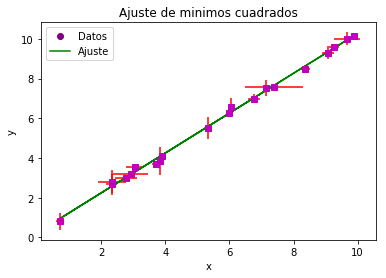

In [86]:
x2 = [(dato)**2 for dato in x]
xs=sum(x)
xss=sum(x2)

y2 = [(dato)**2 for dato in y]
ys=sum(y)
yss=sum(y2)
xy=0 
count = 0
while count < len(x):
         s=x[count]*y[count]
         xy=s+xy
         count=count+1

ordenada=(ys*xss-xs*xy)/(len(x)*xss-xs*xs)
pendiente=(len(x)*xy-xs*ys)/(len(x)*xss-xs*xs)


print("Con los daatos siguientes;")
print("Valores de x:",x)
print ("Valores de y:",y)
print("-----------------------------------------------")
print("Obtenamos la recta siguiente;")
print("Pendiente real:",pendiente)
print("Ordenada real:",ordenada)

m=pendiente
b=ordenada

xx=np.random.uniform(min(x),max(x),1000)
plt.plot(x,y,'o',label='Datos',color='purple')
plt.plot(xx,m*xx+b,label='Ajuste',color='green')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de minimos cuadrados')
plt.legend()
plt.show

Proponemos unos estimados para que los caminadores comiencen a buscar, en base a los datos que ya conocemos

In [87]:
# Valores m y b inicio
m = m + np.random.uniform(0.0,0.5,1)
b = b + np.random.uniform(0.0,0.5,1)
# Cadenas
ncad = 7 
steps = 10000
# Fit 1 para fit linear 
y1 = np.polyfit(x, y, 1) 
parame= np.poly1d(y1)
# Tamaño de los pasos (sigmas)
pasom = 1
pasob = 1


Aproximacion de minimos cuadrados por libreria

In [92]:
# Funcion para graficar las barras de error de los datos
#def ploterry(x, y, x_e, y_e):
 #   plt.errorbar(x, y, yerr=y_e, fmt='+', color='r')
     
# Modelo 
def plot_line(b, m, **kwargs):
    p = plt.plot(x, parame(x), 'r', alpha=0.5, **kwargs)
    plt.show()
    return p
#Minimos cuadrados con libreras
def leastsq(x, y):
    print ('Ajuste usando minimos cuadrados')
    y1 = np.polyfit(x, y, 1) # se usara la funcion fit por facilidad, el 1 al final denota un fit linear 
    parame= np.poly1d(y1)  #Crea un polinomio, es decir proveniente del fit  
    plt.plot(x,y,'o', markersize=5)  # grafica los puntos de los datos 
    plt.plot(x, parame(x)) # grafica el fit
    print ('b,m =', parame)
    (m, b) = parame
    print
    return (m, b)

Ajuste usando minimos cuadrados
b,m =  
1.004 x + 0.2348


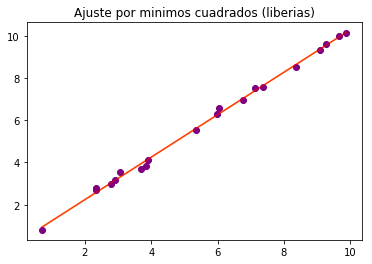

In [101]:
# Minimmos cuadrados sin tener en cuenta  el error
(m, b) = leastsq(x, y)
plt.title('Ajuste por minimos cuadrados (liberias)')
plt.plot(x,y,'o',label='Datos',color='purple')
plot_line(m, b)

Definiciones importantes

In [94]:
# Likehood Gaussiana para una linea recta
def likelihood(x, y, y_e, m, b):
    return np.prod(1./(np.sqrt(2.*np.pi) * y_e) * np.exp(-(y - (m * x + b))**2 / (2. * (y_e)**2)))

In [95]:
# Prior en base a lo conocido por el metodo anlaitico
def prior(m,b):
    if ((0. < m <2.) and (0. < b < 0.5)):
        return 0.
    else:
        return -np.infty
    return 

Metodo MCMC

In [96]:
#  Contador
chain = []
probs = []

In [102]:
for j in range(ncad):
    if (j==0): 
        # Se comienza con las estimaciones iniciales propuesta
        minicial = m
        binicial = b
    elif (j==1):
        # Obtenemos los mejores valores de m y b con la probabilidad maxima
        mm = [m for m,b in chain]
        bb = [b for m,b in chain]
        
        # Obteniendo los mejores valores de m, b cnon la probabilidad
        besti = np.argmax(probs)
        bestm = mm[besti]
        bestb = bb[besti]        
    elif (j>=1):
        pasom = 2*np.std(mm)
        pasob = 2*np.std(bb) # Redefinimos los sigmas con la desviacione standar de la primera cadena
        minicial = np.random.normal(bestm,pasom) # y obtenemos valores aleatorio normales para m y b
        binicial = np.random.normal(bestb,pasom)        
    for i in range(steps):
        # Obteniendo un valor aleatorio normalizado de m y b
        mnue = np.random.normal(minicial,pasom)
        bnue = np.random.normal(binicial,pasob)      
        nueprob = likelihood(x, y, y_e, mnue, bnue) # Probabilidad con los nuevos m y b
        vieprob = likelihood(x, y, y_e, minicial, binicial)# Probabilidad de m y b iniciales  
        lnprior = prior(mnue,bnue) # Obteniendo valor de prior para los m y b nuevos      
        if (lnprior == 0.):
            nueprob = nueprob 
        else:
            nueprob = nueprob + lnprior
            
        # Se elige la probabilidades adecuaca para m
        if (nueprob/vieprob > 1):
            minicial = mnue
            binicial = bnue
            prob = nueprob
        else:
            probtest = np.random.uniform(0,1)
            if (probtest> nueprob/vieprob):
                prob = vieprob
            else:
                minicial = mnue
                binicial = bnue
                prob = nueprob
                
        
        chain.append((minicial,binicial))
        probs.append(prob)

Graficamos

No handles with labels found to put in legend.


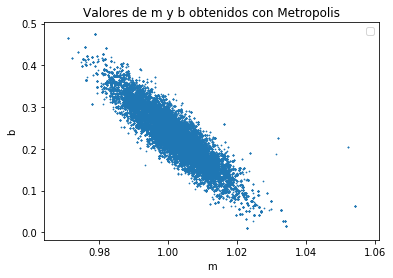

In [99]:
mm = [m for m,b in chain]
bb = [b for m,b in chain]
plt.scatter(mm, bb, s=3, lw = 0)
# Mejor valor obtenido de m y b
plt.plot(label='Best m,b',markersize=5, markerfacecolor='r') #plt.plot(bestm, bestb, 'ko', label='Best m,b',markersize=5, markerfacecolor='r')
plt.xlabel('m')
plt.ylabel('b')
plt.title('Valores de m y b obtenidos con Metropolis')
plt.legend()
plt.show()

Evolucion de la pendiente y ordendada

No handles with labels found to put in legend.


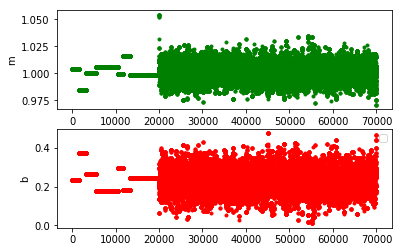

In [100]:
plt.clf()
plt.title('Graficas de muestreo para las cadenas consecutivas')
plt.subplot(2,1,1)
plt.plot(mm, 'g.')
plt.ylabel('m')
plt.subplot(2,1,2)
plt.plot(bb, 'r.')
plt.ylabel('b')
plt.legend()
plt.show()